# explore


In [4]:
#| default_exp explore

In [16]:
#| export
import numpy as np
from graphviz import Digraph

In [22]:
#| export 
class Value:
    
    def __init__(self, data: float, _prev:set=(), _op: str='', label='') -> None:
        self.data = data
        self._prev = _prev
        self._op = _op
        self.label = label
        
    def __repr__(self) -> str:
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        return Value(self.data + other.data, _prev=(self,other),_op='+')
    
    def __mul__(self, other):
        return Value(self.data * other.data, _prev=(self,other),_op='*')

In [34]:

a = Value(2., label='a')
b = Value(3., label='b')
c = Value(10., label='c')
e = a*b; e.label='e'
d=c+e; d.label='d'
f = Value(-2, label='f')
L = f*d; L.label='L'


In [29]:
d._op
d._prev[1]._op

'*'

((1, 1, 2, 3, 1, 1), (1, 1, 2, 3))

In [37]:
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{%s | data %.4f }" % (n.label, n.data), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

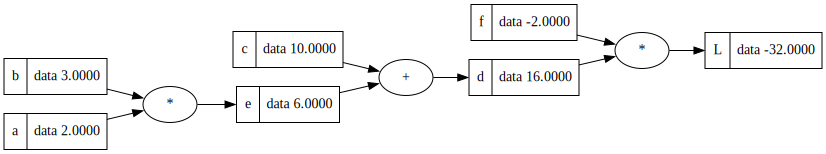

In [38]:
draw_dot(L)

In [25]:
l = [1,2,4,1]
l, set(l)
np.unique(np.array([1,2,4,1]))


array([1, 2, 4])